# Social Simulation

Jose Ortega y Gasset
> I am I and my circumstances." 


Oscar Wilde
>Most people are other people. Their thoughts are someone else's opinions,
their lives a mimicry, their passions a quotation."


### A simple model of economy
Let's first think about a simple model of economy in which agents exchange money at random with each other.

- Say initially each agent has a wealth of 500 dollars. 
- Simulation runs over discrete time steps. 
- At each tick, agents with non-zero wealth give one dollar to a random agent. 

What would be the resulting wealth distribution? There is a NetLogo model for
this setting. If we run it, we interestingly obtain a power-law distribution which
corresponds to a great inequality in wealth. 

Actually, one can modify the model such that agents with negative wealth can also give money to others. By doing so, you remove one type of barrier for interaction and then power-law distribution disappears.
Again we witness how interaction structure generates the behavior.

In [2]:
from random import randint

randint?

In [3]:
class ecoman():
    """Ecoman is an economic agent!"""
    def __init__(self, ID, money = 5):
        self.ID = ID
        self.money = money
    def give(self):
        self.money = self.money - 1
    def take(self):
        self.money = self.money + 1 
    def budget(self):
        return self.money
        
class ecomania():
    """A Simple Model of Economy"""
    def __init__(self, N = 10):
        self.N = N
        self.ecomen = [ecoman(i) for i in range(self.N)]
        
    def exchange(self):
        # Select two random ecoman, A:giver and B:taker
        A, B = self.ecomen[randint(0, self.N-1)], self.ecomen[randint(0, self.N-1)]
        if A.budget() > 0:
            A.give()
            B.take()
        
    def budgets(self):
        return [man.budget() for man in self.ecomen]
    
    def describe(self):
        for i in range(self.N):
            A = self.ecomen[i]
            print("Ecoman ", A.ID, "has ", A.budget(), " dollar")
    

In [4]:
world = ecomania()
world.describe()

Ecoman  0 has  5  dollar
Ecoman  1 has  5  dollar
Ecoman  2 has  5  dollar
Ecoman  3 has  5  dollar
Ecoman  4 has  5  dollar
Ecoman  5 has  5  dollar
Ecoman  6 has  5  dollar
Ecoman  7 has  5  dollar
Ecoman  8 has  5  dollar
Ecoman  9 has  5  dollar


In [5]:
world.exchange()
world.describe()

Ecoman  0 has  5  dollar
Ecoman  1 has  5  dollar
Ecoman  2 has  5  dollar
Ecoman  3 has  5  dollar
Ecoman  4 has  5  dollar
Ecoman  5 has  5  dollar
Ecoman  6 has  6  dollar
Ecoman  7 has  5  dollar
Ecoman  8 has  4  dollar
Ecoman  9 has  5  dollar


In [6]:
world.budgets()

[5, 5, 5, 5, 5, 5, 6, 5, 4, 5]

In [7]:
world = ecomania(N = 100)
def runTheWorld():
    for time in range(1000000):
        world.exchange()

runTheWorld()
sorted(world.budgets())[:20]    

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

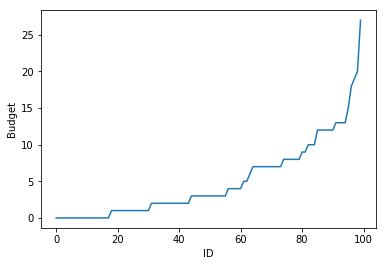

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(sorted(world.budgets()))
plt.xlabel('ID'); plt.ylabel('Budget')

(array([ 44.,  19.,  17.,   5.,  10.,   1.,   1.,   2.,   0.,   1.]),
 array([  0. ,   2.7,   5.4,   8.1,  10.8,  13.5,  16.2,  18.9,  21.6,
         24.3,  27. ]),
 <a list of 10 Patch objects>)

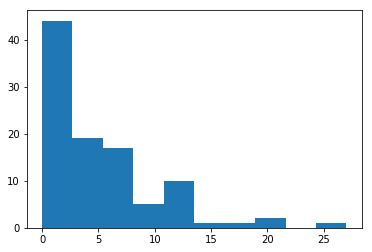

In [9]:
plt.hist(world.budgets())

### Cultural Model

We considered economy as a simple process of spreading money within a society.
For sure, when an agent gives money to another, the giver loses its money. This
is the case for material things. 

> What if agents exchange non-material things such
as information, beliefs or cultural features? How we can model the dynamics of a
culture? 

Another model by Robert Axelrod who has known for his in
uential work on cooperation can help us. In his work on the dissemination of culture, 
 - each agent is represented by a string of features and is located on a grid. 
 - Agents follow the homophily principle for interaction. 
 - The interaction probability is a function of similarity. 

As an example, consider two agents 12345 and 87645 which are similar only
in the last two positions out of five positions in their representations. Their interaction
probability is then 2/5 = 0.4. 

- If the interaction probability is not zero between two local neighbors, one of the agent adopts a non-matching feature of the other. 

> As a result, more similar agents interact more and then become even more similar. As a
side effect, less similar agents become even more dissimilar and as simulation iterates
impassable group boundaries come to form. 

Regions with different cultures emerge.
Interestingly interaction structure depending on similarity, creates polarization on the
macro level. 

> Once again we witness how micro-motives and macro-behavior fail to
align, in an agent-based model.

In [40]:
from random import randint

class socialMan():
    """socialMan is a social agent, that exchanges information!
    idea = 0, means agent does not have any idea
    idea = 1, means agent have an idea
    """
    def __init__(self, ID, idea = 0):
        self.ID = ID
        self.idea = idea
    def give(self):
        return self.getIdea()
    def take(self, new_idea):
        if(self.idea == 0):
            self.idea = new_idea
    def getIdea(self):
        return self.idea
        
class socialWorld():
    """A Simple Model of Economy"""
    def __init__(self, N = 10):
        self.N = N
        self.socialMen = [socialMan(i) for i in range(self.N)]
        # Initially, only one agent has an idea
        self.socialMen[0].take(1)
        
    def exchange(self):
        # Select two random socialMan, A:giver and B:taker
        A, B = self.socialMen[randint(0, self.N-1)], self.socialMen[randint(0, self.N-1)]
        if A.getIdea() == 1:
            B.take(A.give())
        
    def ideas(self):
        return [man.getIdea() for man in self.socialMen]
    
    def describe(self):
        for i in range(self.N):
            A = self.socialMen[i]
            print("socialMan ", "has ", A.getIdea(), " idea")
  

In [41]:
world = socialWorld()
world.describe()

socialMan  has  1  idea
socialMan  has  0  idea
socialMan  has  0  idea
socialMan  has  0  idea
socialMan  has  0  idea
socialMan  has  0  idea
socialMan  has  0  idea
socialMan  has  0  idea
socialMan  has  0  idea
socialMan  has  0  idea


In [42]:
s = socialMan(3) 

In [43]:
s.getIdea()

0

In [51]:
world = socialWorld(N = 100)
time = 2000
adopters = [0] * time
def runTheWorld():
    for t in range(time):
        world.exchange()
        adopters[t] = sum(world.ideas())

runTheWorld()

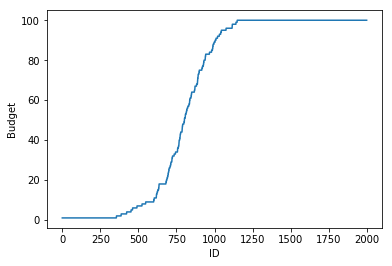

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(adopters)
plt.xlabel('ID'); plt.ylabel('Budget')